In [1]:
import healpy as hp
import matplotlib.pyplot as plt

import pickle

from qubic.lib.QskySim import get_angular_profile, get_noise_invcov_profile

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [2]:
new = pickle.load(open("/home/laclavere/Thesis/qubic/qubic/scripts/MapMaking/src/FMM/test_qubic_only/Dict/test_None.pkl", "rb"))
old = pickle.load(open("/home/laclavere/Thesis/qubic/qubic/scripts/MapMaking/src/FMM/test_qubic_planck/Dict/test_None.pkl", "rb"))

print(new["parameters"]["PLANCK"]["external_data"])
print(old["parameters"]["PLANCK"]["external_data"])

False
True


In [3]:
new["parameters"]

{'path_out': 'test_qubic_only/',
 'datafilename': 'test',
 'CMB': {'cmb': True, 'seed': 1, 'r': 0, 'Alens': 1},
 'Foregrounds': {'Dust': False, 'Synchrotron': False},
 'QUBIC': {'instrument': 'DB',
  'configuration': 'FI',
  'npointings': 1000,
  'nsub_in': 8,
  'nsub_out': 8,
  'nrec': 2,
  'convolution_in': True,
  'convolution_out': False,
  'bandpass_correction': True,
  'NOISE': {'ndet': 1,
   'npho150': 1,
   'npho220': 1,
   'detector_nep': 4.7e-17,
   'duration_150': 3,
   'duration_220': 3,
   'seed_noise': 1357563295},
  'SYNTHBEAM': {'synthbeam_kmax': 1, 'synthbeam_fraction': 1},
  'dtheta': 15},
 'SKY': {'nside': 128,
  'coverage_cut': 0.01,
  'RA_center': 0,
  'DEC_center': -57},
 'PLANCK': {'external_data': False,
  'weight_planck': 0,
  'level_noise_planck': 1,
  'seed_noise': 1357563295,
  'bandwidth_planck': 0.2,
  'nsub_planck': 100},
 'Pipeline': {'mapmaking': True, 'spectrum': False},
 'PCG': {'n_iter_pcg': 300,
  'tol_pcg': 1e-25,
  'preconditioner': True,
  'initi

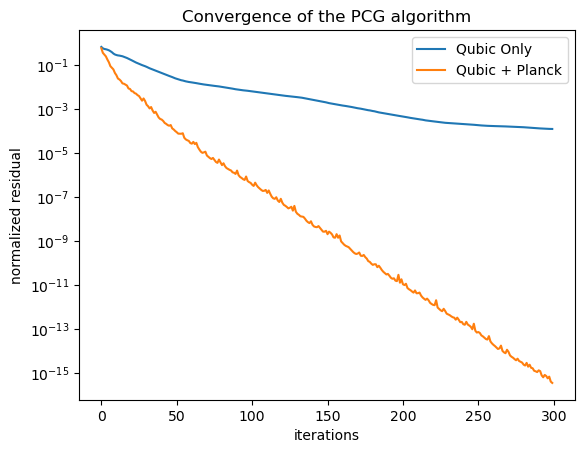

In [4]:
convergence_new = new["convergence"]
convergence_old = old["convergence"]

plt.plot(convergence_new, label="Qubic Only")
plt.plot(convergence_old, label="Qubic + Planck")
plt.xlabel('iterations')
plt.ylabel('normalized residual')
plt.title('Convergence of the PCG algorithm')
plt.yscale('log')
plt.legend()
plt.show()

In [5]:
maps_in_new = new['maps_in']
maps_rec_new = new['maps']
residuals_new = new['maps_noise']

maps_in_old = old['maps_in']
maps_rec_old = old['maps']
residuals_old = old['maps_noise']

Qubic Only


Text(0.5, 1.0, 'Qubic Only')

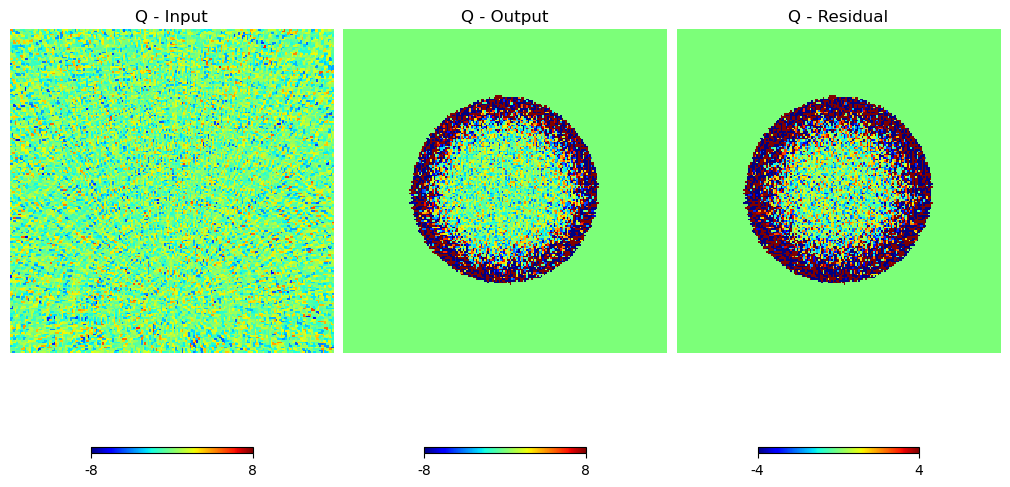

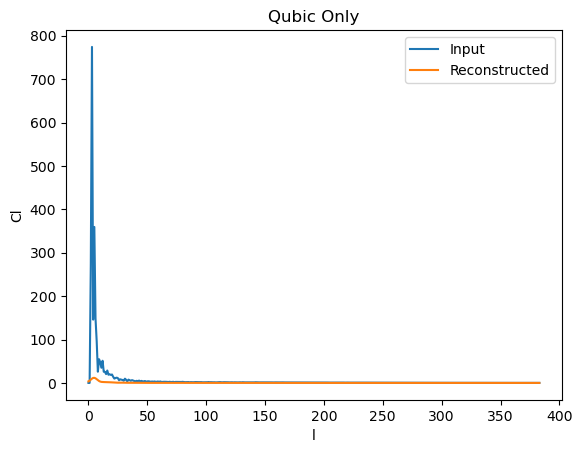

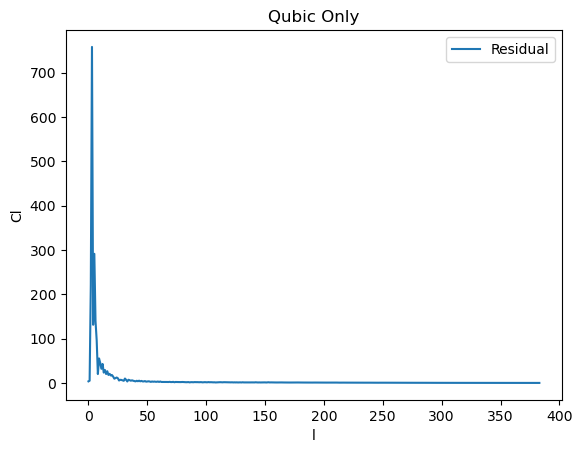

In [6]:
stk = ['I', 'Q', 'U']
inu = 1
istk = 1
n_sig = 3
reso = 30
min = -8
max = 8

plt.figure(figsize=(10, 12))
print("Qubic Only")
k=1
hp.gnomview(maps_in_new[inu, :, istk], cmap='jet', rot=new['center'], min=min, max=max, reso=reso, sub=(1, 3, k), title=f'{stk[istk]} - Input', notext=True)
hp.gnomview(maps_rec_new[inu, :, istk], cmap='jet', rot=new['center'], min=min, max=max, reso=reso, sub=(1, 3, k+1), title=f'{stk[istk]} - Output', notext=True)
hp.gnomview(residuals_new[inu, :, istk], cmap='jet', rot=new['center'], min=min/2, max=max/2, reso=reso, sub=(1, 3, k+2), title=f'{stk[istk]} - Residual', notext=True)
k+=3

plt.figure()
plt.plot(hp.anafast(maps_in_new[inu, :, 0]), label="Input")
plt.plot(hp.anafast(maps_rec_new[inu, :, 0]), label="Reconstructed")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("Qubic Only")

plt.figure()
plt.plot(hp.anafast(maps_in_new[inu, :, 0] - maps_rec_new[inu, :, 0]), label="Residual")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("Qubic Only")

Qubic + Planck


Text(0.5, 1.0, 'Qubic + Planck')

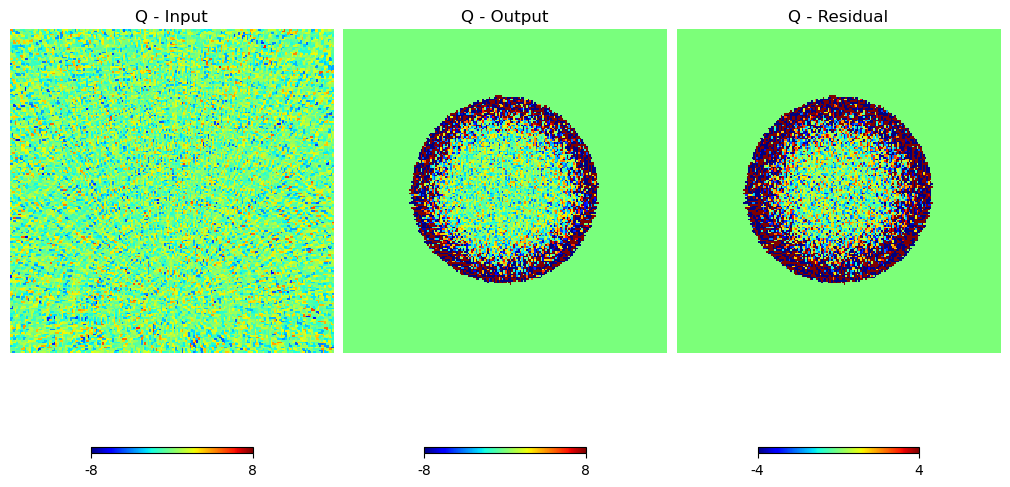

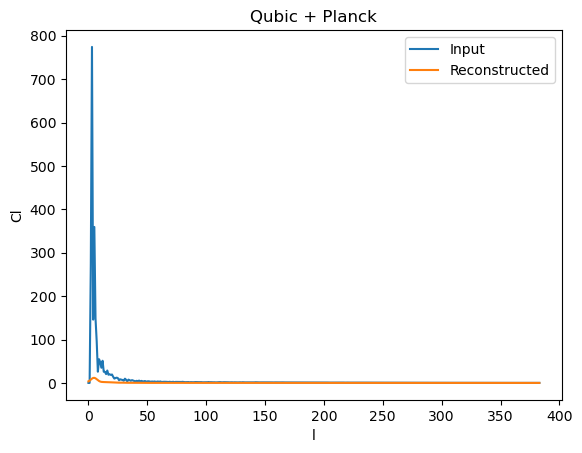

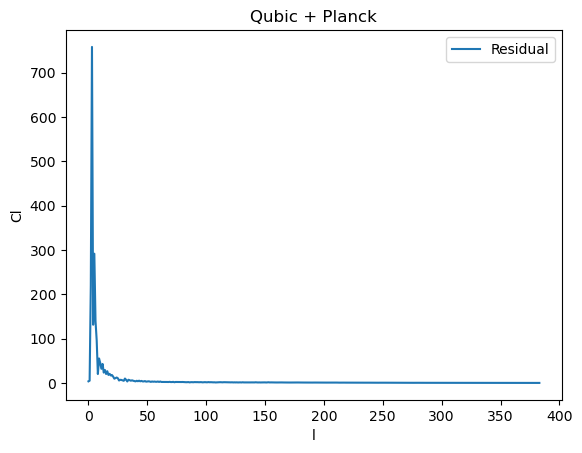

In [7]:
plt.figure(figsize=(10, 12))
print("Qubic + Planck")
k=1
hp.gnomview(maps_in_old[inu, :, istk], cmap='jet', rot=old['center'], min=min, max=max, reso=reso, sub=(1, 3, k), title=f'{stk[istk]} - Input', notext=True)
hp.gnomview(maps_rec_old[inu, :, istk], cmap='jet', rot=old['center'], min=min, max=max, reso=reso, sub=(1, 3, k+1), title=f'{stk[istk]} - Output', notext=True)
hp.gnomview(residuals_old[inu, :, istk], cmap='jet', rot=old['center'], min=min/2, max=max/2, reso=reso, sub=(1, 3, k+2), title=f'{stk[istk]} - Residual', notext=True)
k+=3

plt.figure()
plt.plot(hp.anafast(maps_in_old[inu, :, 0]), label="Input")
plt.plot(hp.anafast(maps_rec_old[inu, :, 0]), label="Reconstructed")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("Qubic + Planck")

plt.figure()
plt.plot(hp.anafast(maps_in_old[inu, :, 0] - maps_rec_old[inu, :, 0]), label="Residual")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("Qubic + Planck")

(79,) (79,) (79,)
(79,) (79,) (79,)


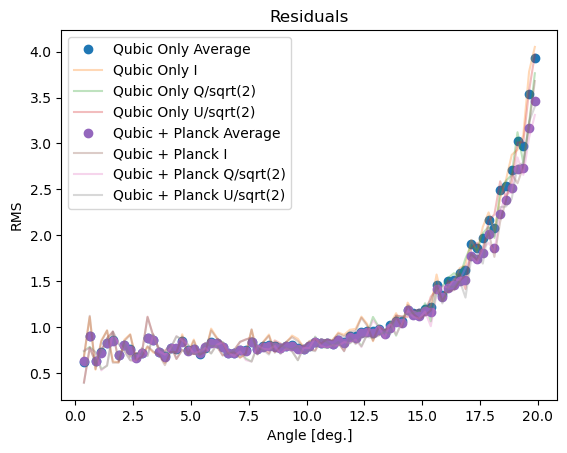

In [18]:
get_angular_profile(residuals_new[0], doplot=True, allstokes=True, nbins=80, thmax=20, label="Qubic Only")
get_angular_profile(residuals_old[0], doplot=True, allstokes=True, nbins=80, thmax=20, label="Qubic + Planck")
plt.title("Residuals")
plt.show()

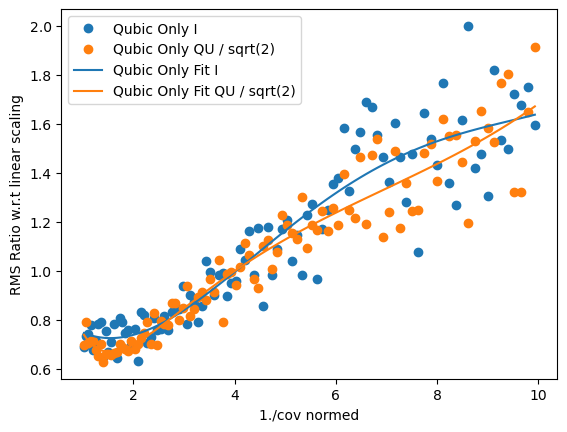

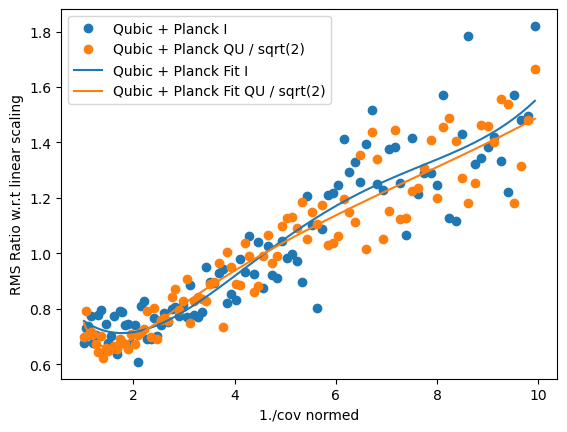

In [9]:
get_noise_invcov_profile(residuals_new[0], new["coverage"], doplot=True, allstokes=True, label="Qubic Only")
plt.figure()
get_noise_invcov_profile(residuals_old[0], old["coverage"], doplot=True, allstokes=True, label="Qubic + Planck")
plt.show()